# Governance analysis

Notebook with data analysis and distribution for governance (voter) information

## Import libraries

In [6]:
import os
import sys

import pandas as pd
import geopandas as gpd
import numpy as np

import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

## Download data

In [2]:
gdf = aup.gdf_from_db('participacion_gdl_hexres8', 'governance')
print(gdf.shape)
gdf.head(4)

(1186, 4)


,hex_id_8,city,geometry,parti_max
0,8849abc9ebfffff,Guadalajara,"POLYGON ((-103.61319 20.42802, -103.61772 20.4...",0.514700
1,8849abc9e3fffff,Guadalajara,"POLYGON ((-103.61374 20.43321, -103.61319 20.4...",0.562442
2,8849abc9e7fffff,Guadalajara,"POLYGON ((-103.59961 20.43722, -103.60414 20.4...",0.581757
3,8849abc9e1fffff,Guadalajara,"POLYGON ((-103.60249 20.41857, -103.59796 20.4...",0.553396


<AxesSubplot:>

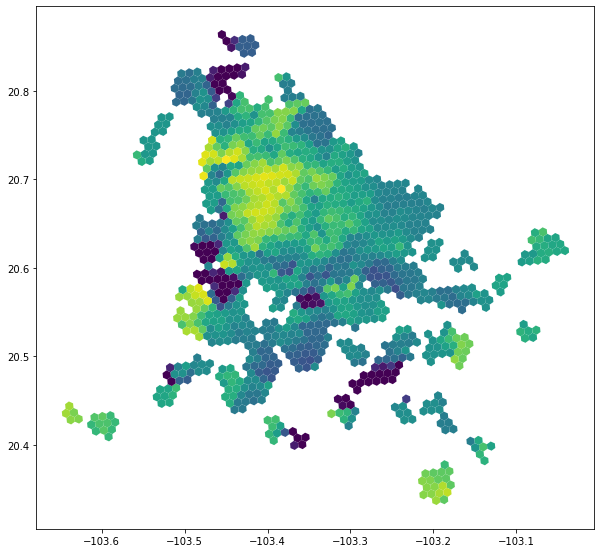

In [3]:
fig,ax = plt.subplots(figsize=(10,10))

gdf.plot('parti_max', ax=ax)

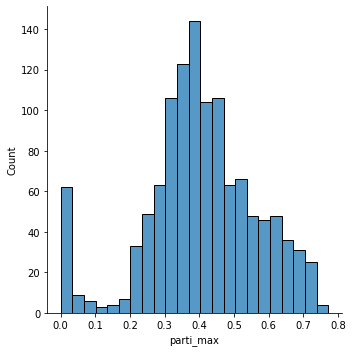

In [4]:
sns.displot(gdf['parti_max'])

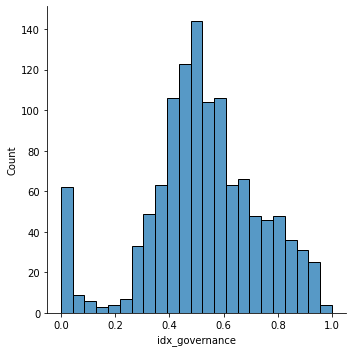

In [7]:
scaler = MinMaxScaler()
ind = np.reshape(gdf['parti_max'].to_numpy(), (-1,1))
scaler = MinMaxScaler()
scaler.fit(ind)

gdf['idx_governance'] = scaler.transform(ind)

sns.displot(gdf['idx_governance'])

<AxesSubplot:>

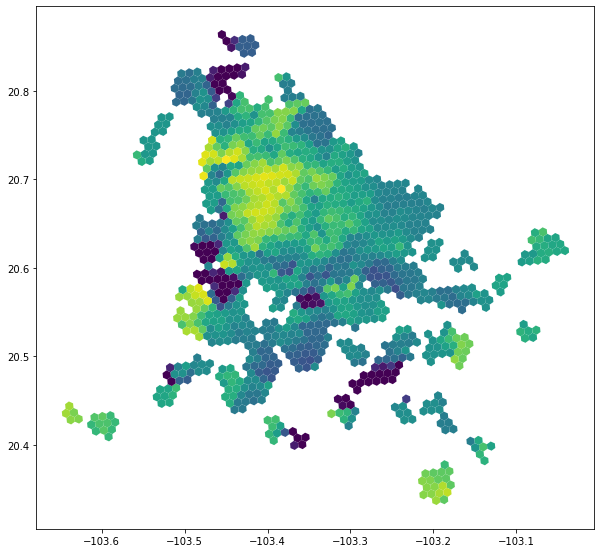

In [8]:
fig,ax = plt.subplots(figsize=(10,10))

gdf.plot('idx_governance', ax=ax)